In [1]:
%matplotlib inline

import gym
import itertools
import matplotlib
import numpy as np
import pandas as pd
import sys

if "../" not in sys.path:
  sys.path.append("../") 

from collections import defaultdict
from lib.envs.windy_gridworld import WindyGridworldEnv
from lib import plotting

matplotlib.style.use('ggplot')

In [2]:
env = WindyGridworldEnv()

In [3]:
def make_epsilon_greedy_policy(Q, epsilon, nA):
    """
    Creates an epsilon-greedy policy based on a given Q-function and epsilon.
    
    Args:
        Q: A dictionary that maps from state -> action-values.
            Each value is a numpy array of length nA (see below)
        epsilon: The probability to select a random action . float between 0 and 1.
        nA: Number of actions in the environment.
    
    Returns:
        A function that takes the observation as an argument and returns
        the probabilities for each action in the form of a numpy array of length nA.
    
    """
    def policy_fn(observation):
        A = np.ones(nA, dtype=float) * epsilon / nA
        best_action = np.argmax(Q[observation])
        A[best_action] += (1.0 - epsilon)
        action = np.random.choice(np.arange(len(A)), p=A)
        return action
    return policy_fn

In [4]:
def sarsa(env, num_episodes, discount_factor=1.0, alpha=0.5, epsilon=0.1):
    """
    SARSA algorithm: On-policy TD control. Finds the optimal epsilon-greedy policy.
    
    Args:
        env: OpenAI environment.
        num_episodes: Number of episodes to run for.
        discount_factor: Gamma discount factor.
        alpha: TD learning rate.
        epsilon: Chance the sample a random action. Float betwen 0 and 1.
    
    Returns:
        A tuple (Q, stats).
        Q is the optimal action-value function, a dictionary mapping state -> action values.
        stats is an EpisodeStats object with two numpy arrays for episode_lengths and episode_rewards.
    """

    # The final action-value function.
    # A nested dictionary that maps state -> (action -> action-value).
    Q = defaultdict(lambda: np.zeros(env.action_space.n))

    # Keeps track of useful statistics
    stats = plotting.EpisodeStats(
        episode_lengths=np.zeros(num_episodes),
        episode_rewards=np.zeros(num_episodes))

    # The policy we're following
    policy = make_epsilon_greedy_policy(Q, epsilon, env.action_space.n)

    for i_episode in range(num_episodes):
        # Print out which episode we're on, useful for debugging.
        if (i_episode + 1) % 100 == 0:
            print("\rEpisode {}/{}.".format(i_episode + 1, num_episodes), end="")
            sys.stdout.flush()

        # Implement this!
        # Reset the environment and pick the first action
        is_done = False
        state = env.reset()
        action = policy(state)

        while not is_done:
            # One step in the environment
            next_state, reward, is_done, _ = env.step(action)
            next_action = policy(next_state)

            stats.episode_rewards[i_episode] += reward
            stats.episode_lengths[i_episode] += 1

            #update Td
            td_target = reward + discount_factor * Q[next_state][next_action]
            td_delta = td_target - Q[state][action]
            Q[state][action] += alpha * td_delta

            state = next_state
            action = next_action

    return Q, stats


In [5]:
Q, stats = sarsa(env, 500)

Episode 500/500.

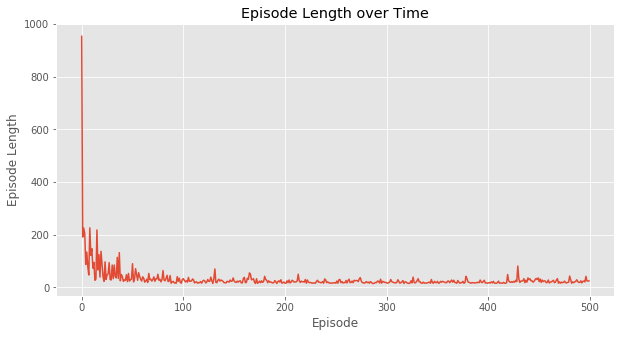

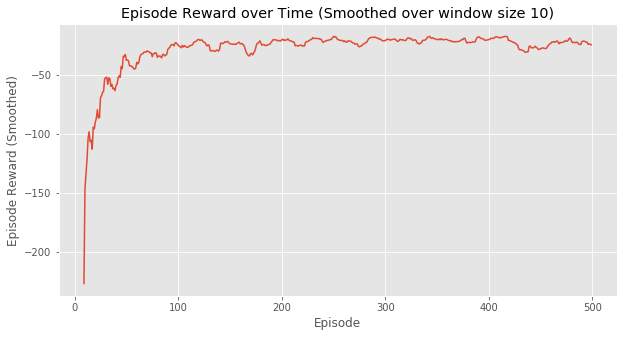

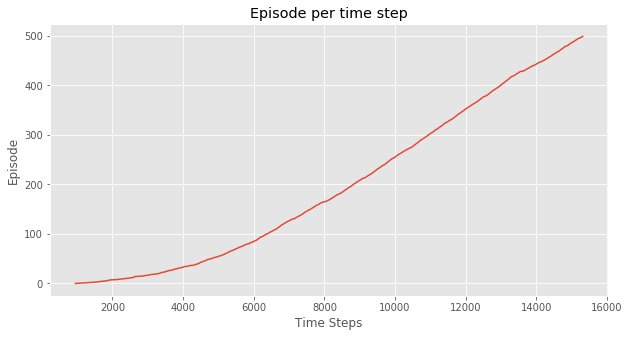

(<Figure size 720x360 with 1 Axes>,
 <Figure size 720x360 with 1 Axes>,
 <Figure size 720x360 with 1 Axes>)

In [6]:
plotting.plot_episode_stats(stats)

In [7]:
stats

Stats(episode_lengths=array([953., 191., 225., 205.,  87., 134.,  79.,  47., 226., 122., 147.,
        73.,  95.,  27.,  32., 218.,  66., 124.,  39., 137.,  89.,  40.,
        23.,  97.,  30.,  48.,  51.,  94.,  30.,  28.,  85.,  33.,  85.,
        41.,  36., 114.,  34., 132.,  25.,  49.,  41.,  23.,  28.,  27.,
        48.,  22.,  53.,  24.,  30.,  31.,  90.,  21.,  33.,  71.,  48.,
        27.,  56.,  42.,  31.,  24.,  40.,  35.,  20.,  24.,  31.,  19.,
        53.,  29.,  31.,  24.,  30.,  40.,  23.,  33.,  32.,  50.,  27.,
        31.,  21.,  30.,  64.,  28.,  25.,  34.,  46.,  22.,  24.,  45.,
        16.,  21.,  23.,  17.,  17.,  16.,  41.,  23.,  35.,  19.,  16.,
        30.,  33.,  27.,  21.,  25.,  20.,  38.,  23.,  24.,  24.,  32.,
        29.,  17.,  20.,  21.,  16.,  18.,  18.,  22.,  16.,  24.,  27.,
        25.,  17.,  20.,  30.,  23.,  23.,  39.,  26.,  15.,  32.,  70.,
        19.,  18.,  27.,  31.,  24.,  28.,  26.,  23.,  18.,  18.,  17.,
        23.,  22.,  20.,  28.